<a href="https://colab.research.google.com/github/Tabook22/ComputerVision/blob/main/BrainTumorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing the ultralytics package. (installing the latest package in our case the latest is YOLOv8)
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 8.6 MB/s eta 0:00:00


In [2]:
#Installing roboflow
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

In [3]:
#Installing the sinppets from roboflow for using Yolov5
from roboflow import Roboflow
rf = Roboflow(api_key="EhdTiQVd7IOWFFV6agFK")
project = rf.workspace("dhofaruniversity").project("tumor-project")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.205, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Tumor-Project-1 in yolov8:: 100%|██████████| 754/754 [00:00<00:00, 6636.77it/s]


In [6]:
#Training the model
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Tumor-Project-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

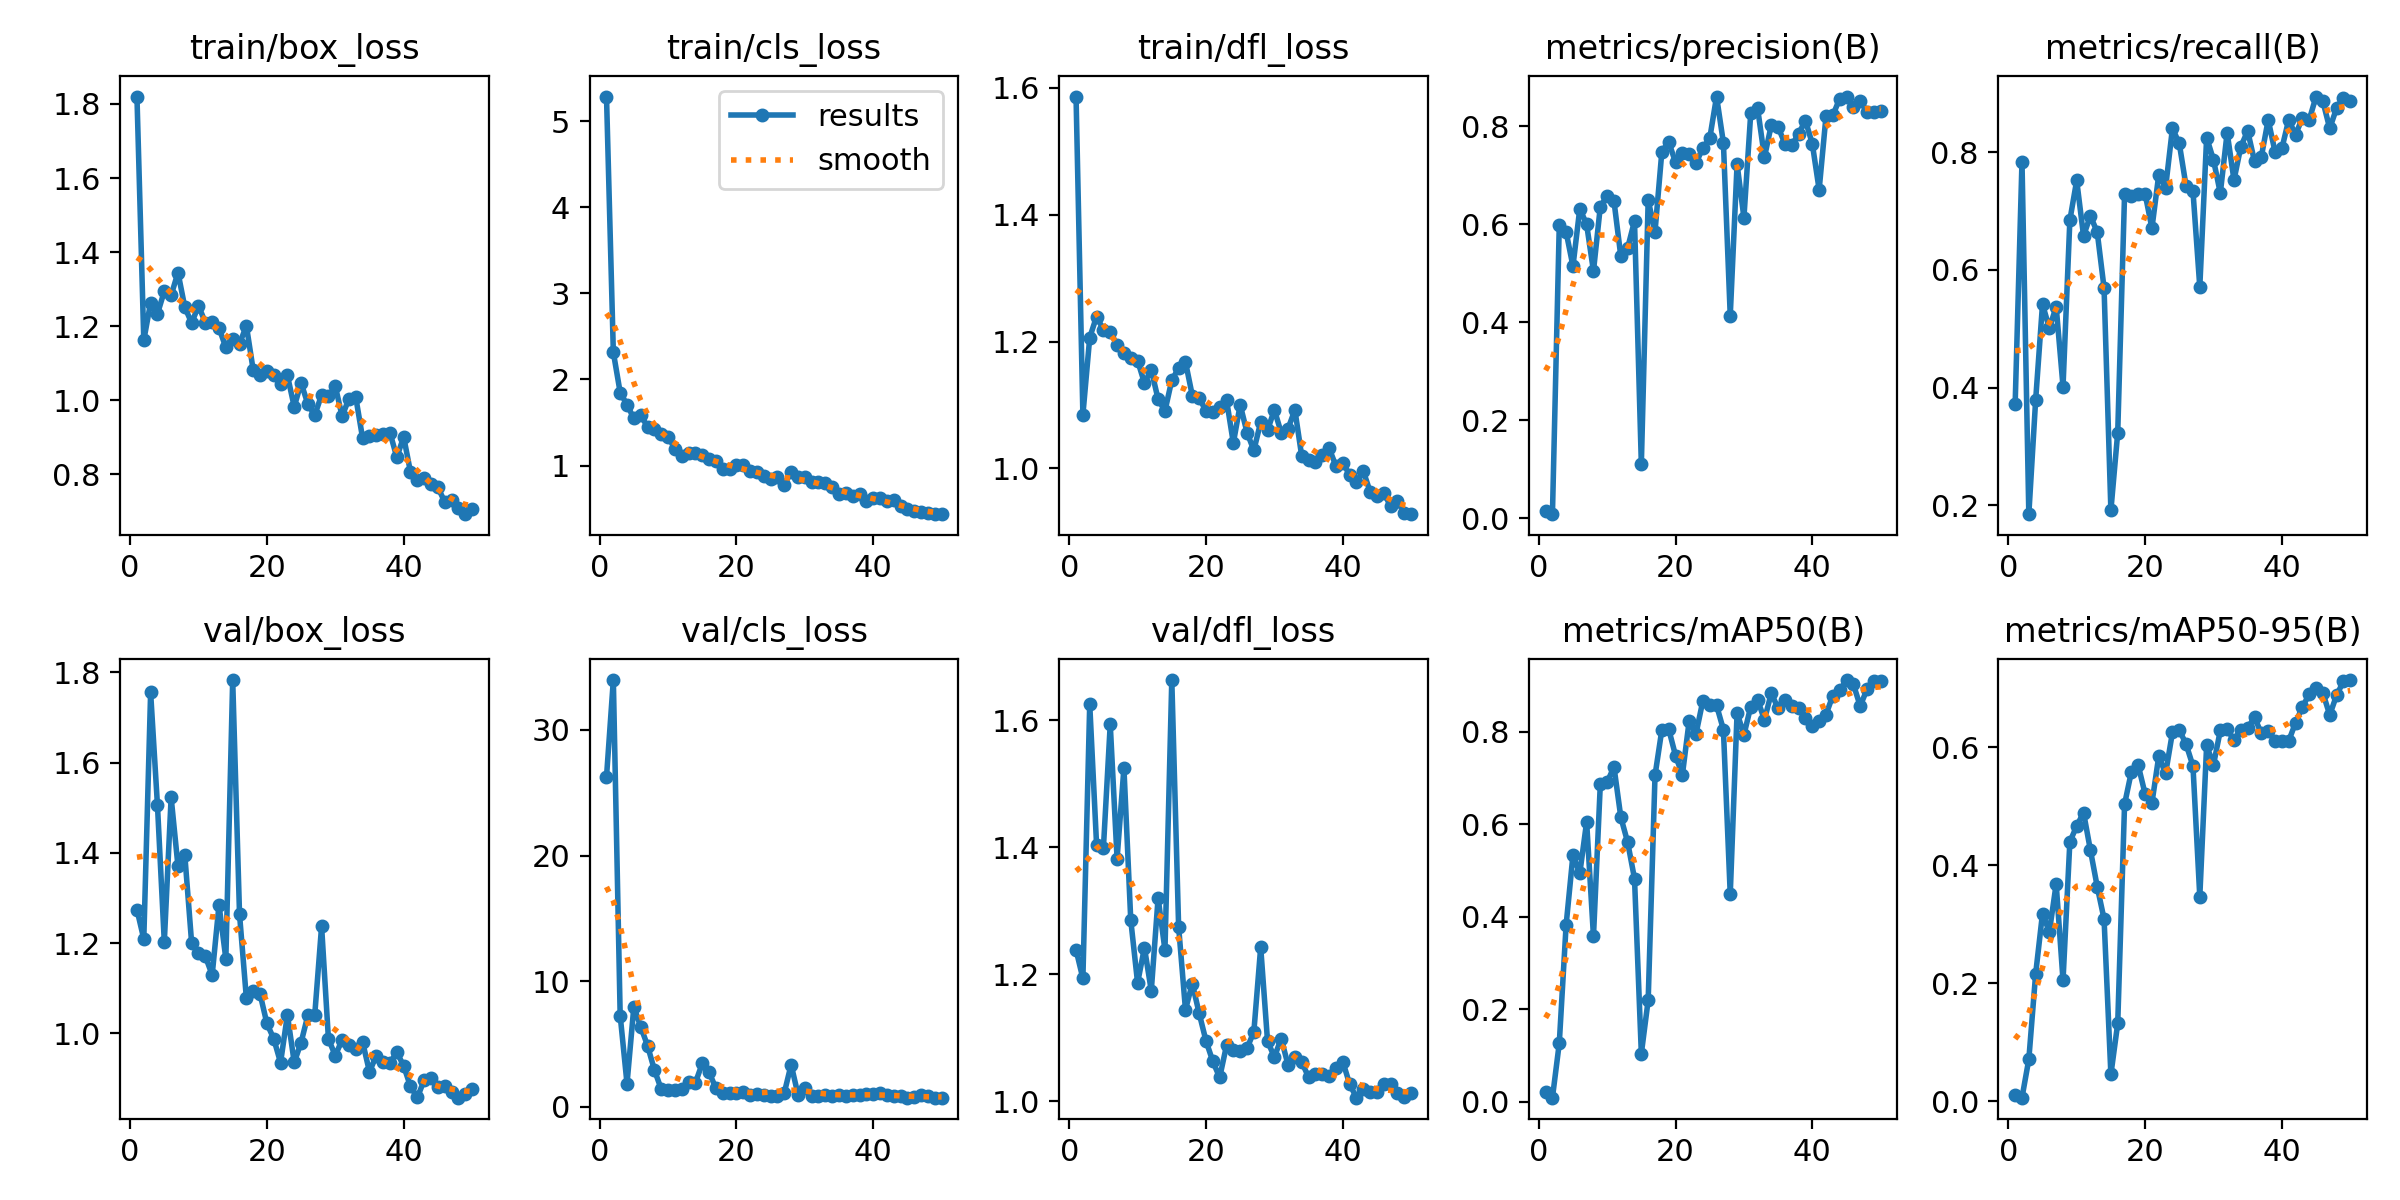

In [10]:
import os
from IPython.display import display, Image
from IPython import display

Image(filename=f'/content/runs/detect/train2/results.png', width=600)

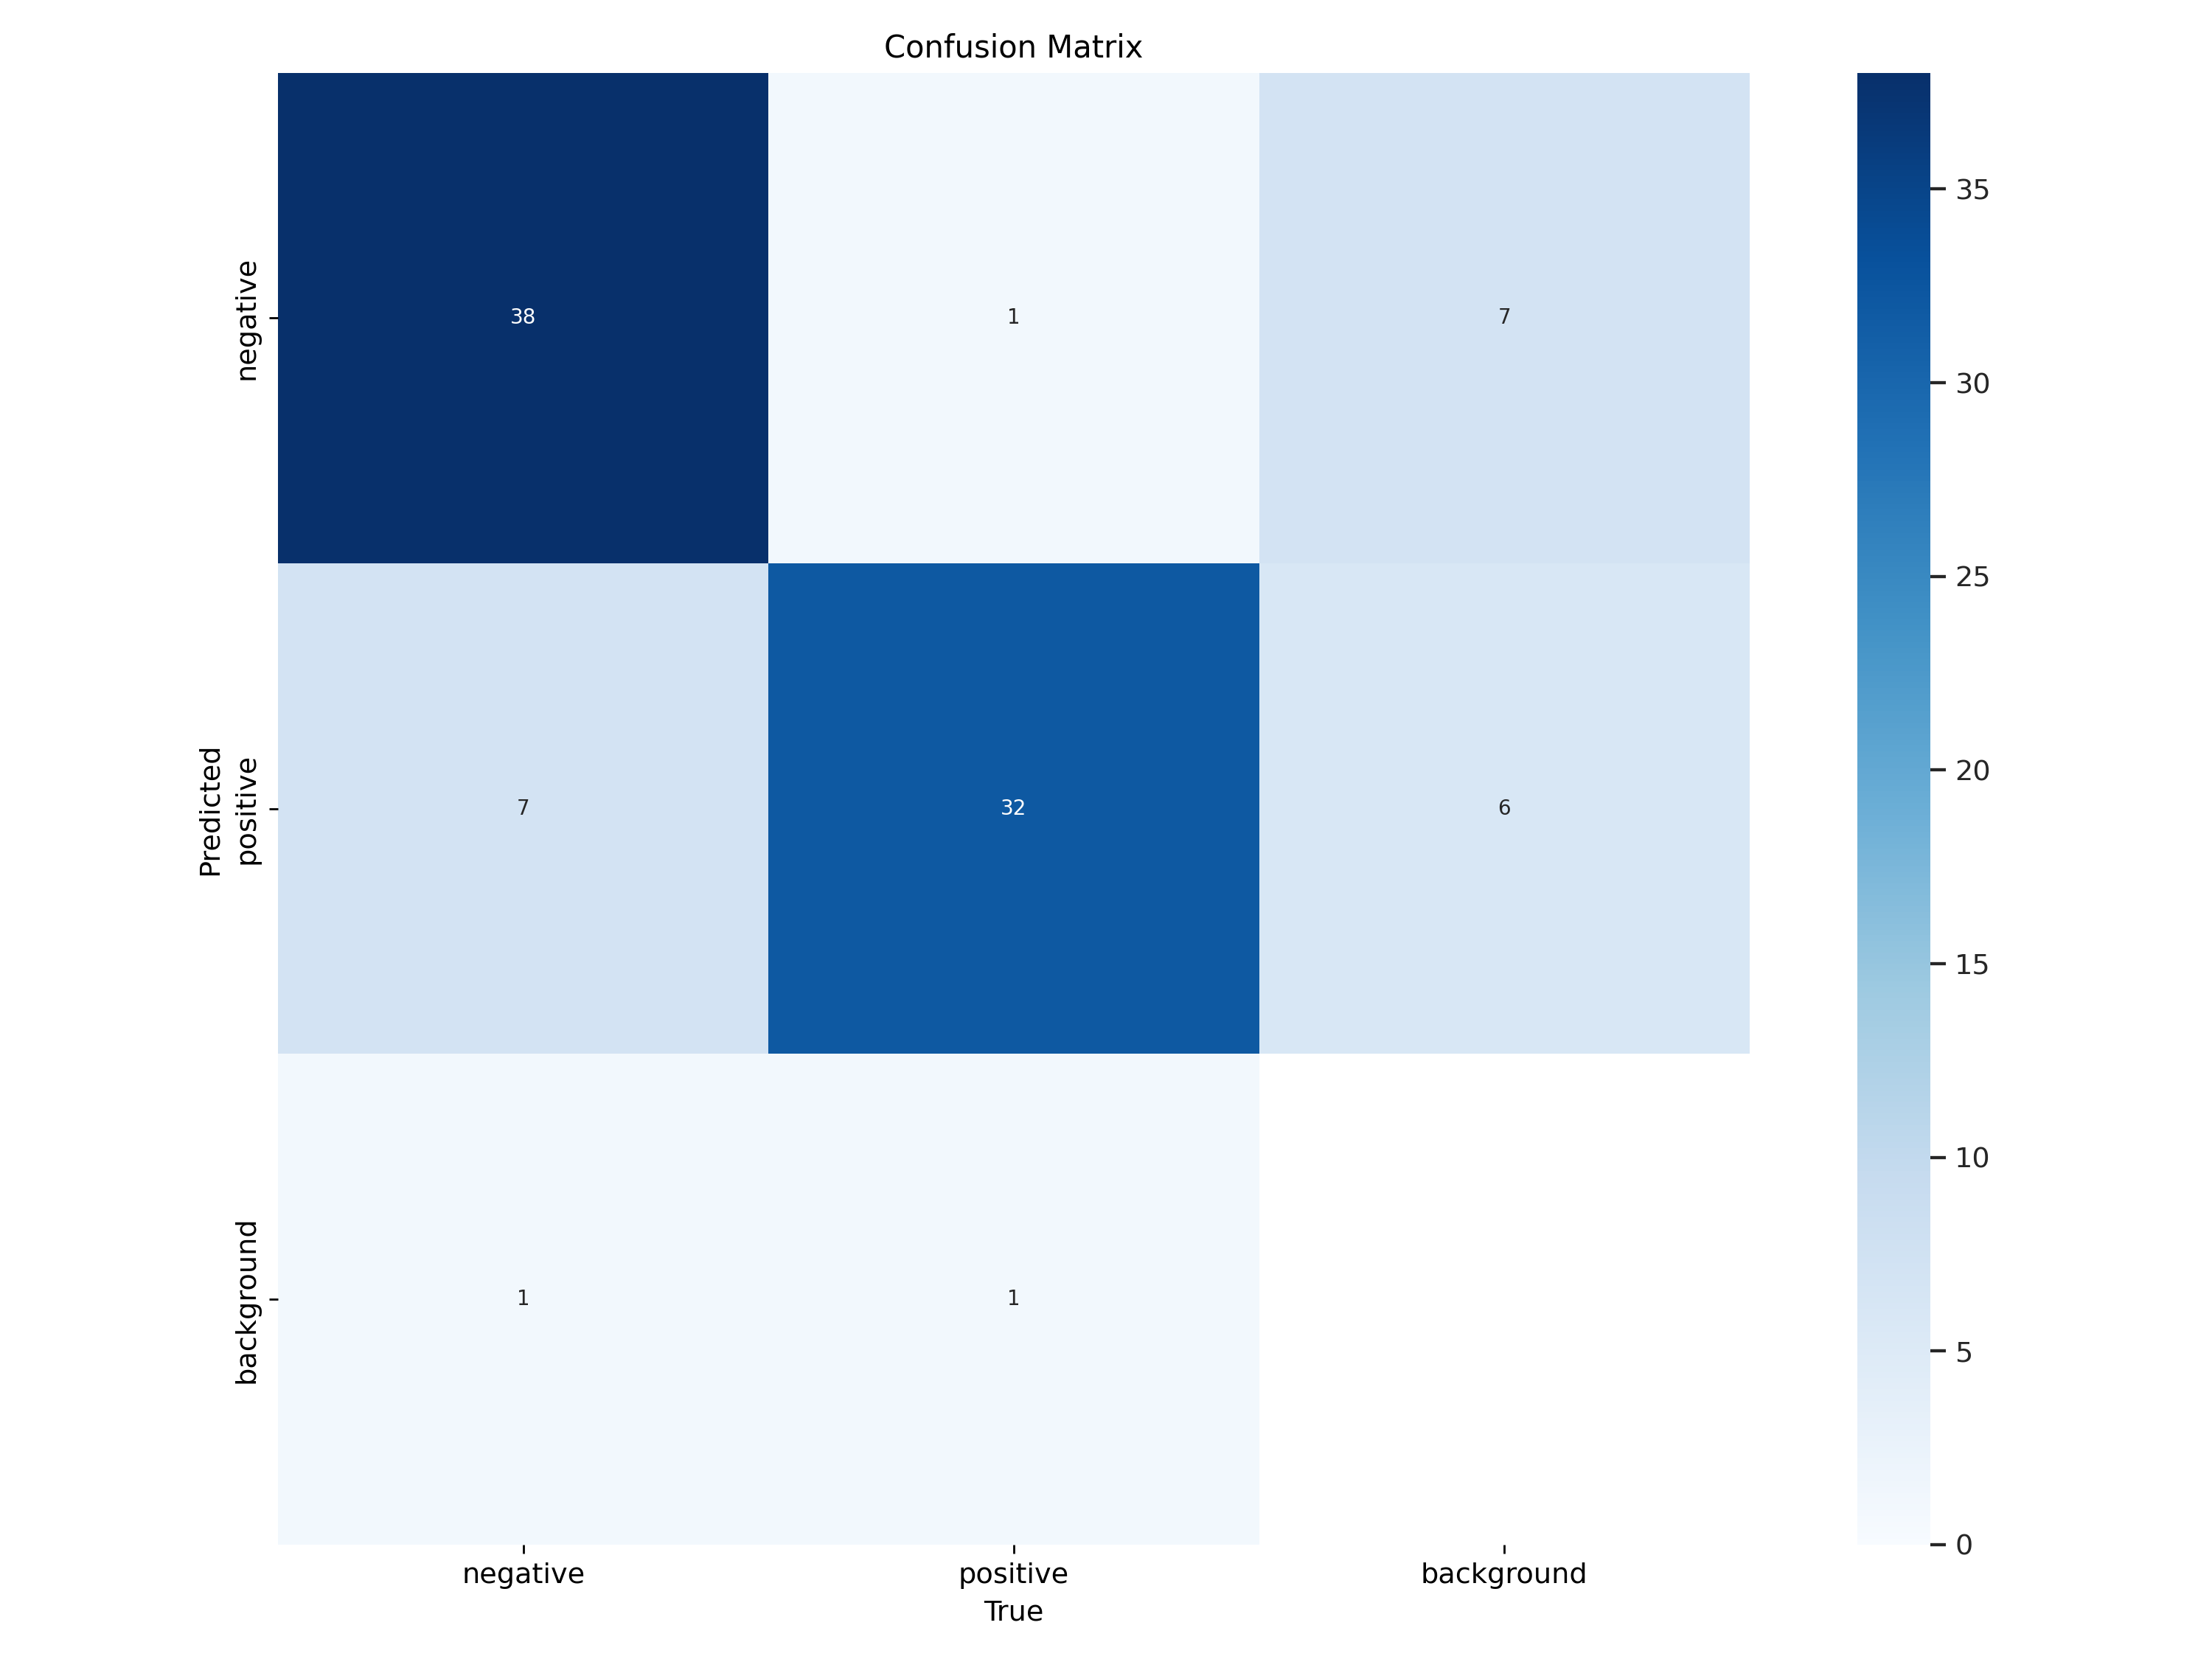

In [12]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

In [13]:
#Here if you have it localy
#!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source='/content/test_img.jpg'

#here if you have it from the net
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source='https://media-us.amboss.com/media/thumbs/big_5b252c1a32b7d.jpg'

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

100% 87.2k/87.2k [00:00<00:00, 20.0MB/s]
image 1/1 /content/big_5b252c1a32b7d.jpg: 544x640 1 negative, 102.9ms
Speed: 4.0ms preprocess, 102.9ms inference, 2.8ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


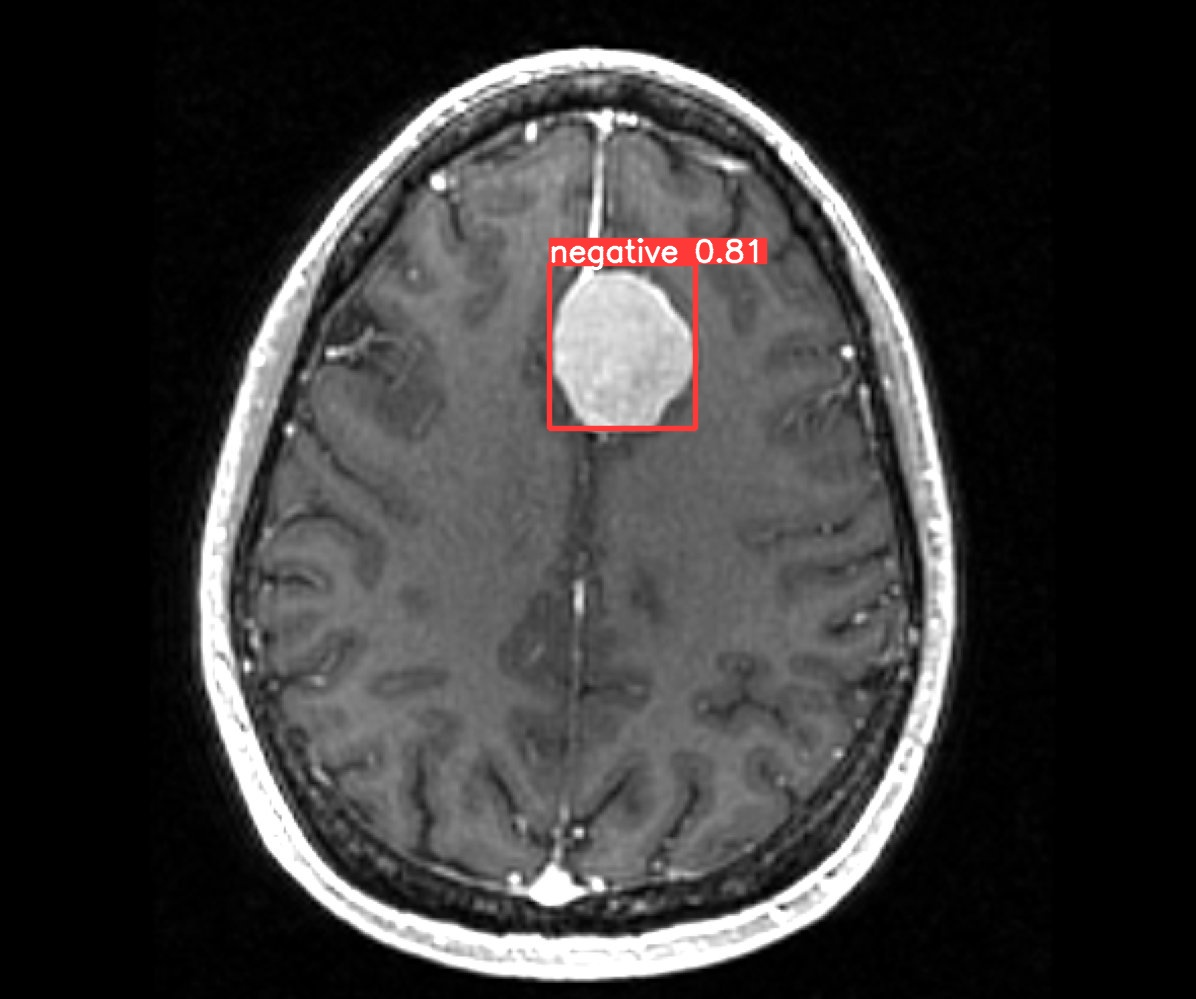

In [14]:
#our you can use the following
Image(filename=f'/content/runs/detect/predict/big_5b252c1a32b7d.jpg', width=600)